# Lecture 3: Formal characterization of spatial point processes                 

## 1. 1-D point processes

Let us discuss mathematical ways to characterize 1-D point processes.

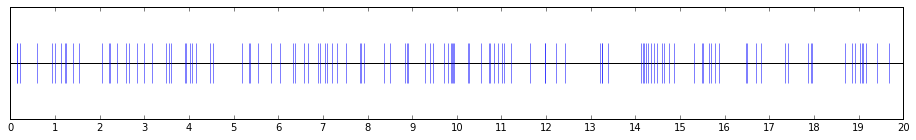

In [1]:
#Uploading library
import numpy as np
#1-D point process with N Poisson distributed points
N_PPP = 100
N = np.random.poisson(N_PPP,1)
#Length: L
L = 20
#Random points in axis x
position_x = np.random.uniform(0,L,N)
#Ploting in 1D and the points
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(16,2), dpi=1200)
plt.hlines(1,0,L)  # Draw a horizontal line
plt.xlim(0,L)
plt.ylim(0.5,1.5)
y = np.ones(N)   # Make all y values the same
plt.plot(position_x,y,'|',ms = 40)  # Plot a line at each location specified in a
plt.axis([0,L,0.5,1.5])
plt.xticks(np.arange(0, L+1, 1))
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

**First idea:** Each random point is related to arrival times such that $t_1 < t_2 < ... < t_N$. The problem is that we are *ordering* the points $t_i$ and therefore creating a strong dependence since $t_i<t_{i+1}$

In [2]:
t = sorted(position_x)
#print t

**Approach 1:** Inter-arrival times $S_i = t_{i+1} - t_i$. If $t_i$ is Poisson, then $S_i$ are *independent* random variables (nice property). 

Note: Inter-arrival distribution of the random varible $S_i$ when the arrival times $t_i$ is Poisson distributed follows an *exponential distribution*. Its pdf is $ f(x) = \lambda e^{-\lambda x}$ where $\lambda$ is the density of points $N/L$ points per units of time.

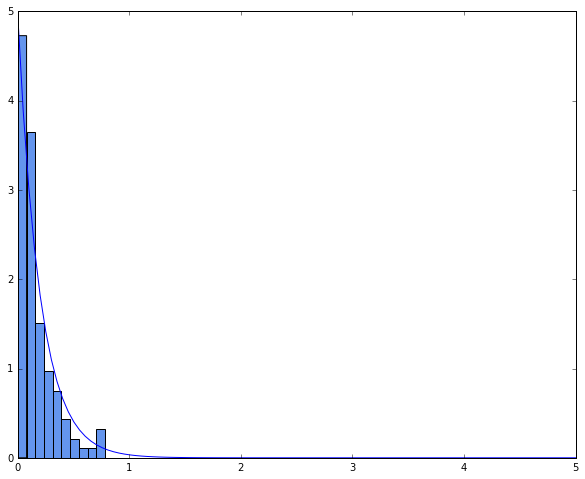

In [5]:
import copy
#Testing
#Generating the intial array
S = np.zeros(N-1)
#Initial state t_0 = 0
S[0] = copy.copy(t[0])
for i in range(1, N-1):
    S[i] = t[i+1] - t[i]
#print S
#Plot the empirical distribution solely based on this realization
from scipy.stats import poisson
from __future__ import division
x = np.linspace(0,5,100)
#print x
plt.figure(figsize=(10,8), dpi=1200)
plt.hist(S,normed=True, color="#6495ED")
plt.plot(x, N_PPP/L * np.exp(-x * N_PPP/L), '-')
plt.show()

**Approach 2:** Counting process $N_T$ that represents the number of points arriving up to time $T$. Mathematically:
$N_T = \sum\limits_{i=1}^N \mathbb{1}\{ t_i \leq T\}$, where $\mathbb{1}\{\cdot\}$ is the indicator function that is equal to 1 when the statement in "$\cdot$" is true.



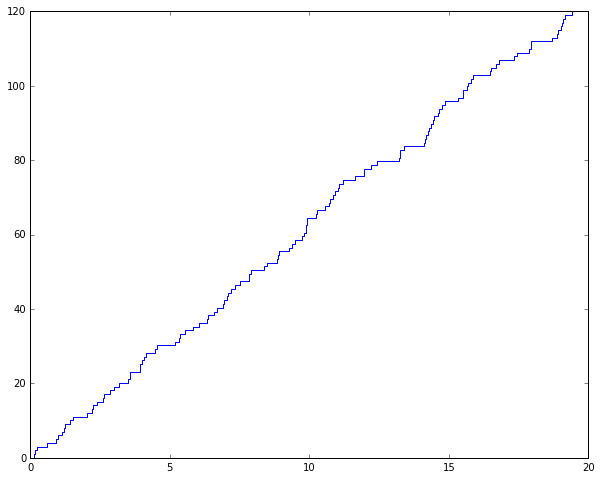

In [6]:
plt.figure(figsize=(10,8), dpi=1200)
plt.step(t,np.linspace(0,N,N), '--')
plt.show()

**Approach 3:** Interval counts: $N(a,b] = N_b - N_a$ for $0 \leq a \leq b$. For Poisson processes, the interval counts for *disjoint* intervals are *stochastically independent*.



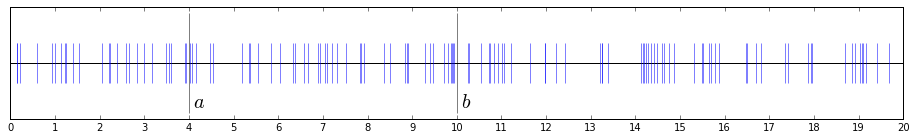

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from pylab import *
plt.figure(figsize=(16,2), dpi=1200)
plt.hlines(1,0,L)  # Draw a horizontal line
plt.xlim(0,L)
plt.ylim(0.5,1.5)
y = np.ones(N)   # Make all y values the same
plt.plot(position_x,y,'|',ms = 40)  # Plot a line at each location specified in a
plt.plot([4, 10],[1,1],'| k',ms = 100)  # Plot a line at each location specified in a
plt.axis([0,L,0.5,1.5])
plt.xticks(np.arange(0, L+1, 1))
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.text(10.1, 0.6, '$b$', fontsize=20)
plt.text(4.1, 0.6, '$a$', fontsize=20)
plt.show()

## 2. Higher dimensional point processes

How should we proceed in higher dimensions? Let us start with 2-D point processes.

**Approach 1:** Couting the number of points $N(A)$ that falls in a closed region $A \subset \mathbb{R}^2$.

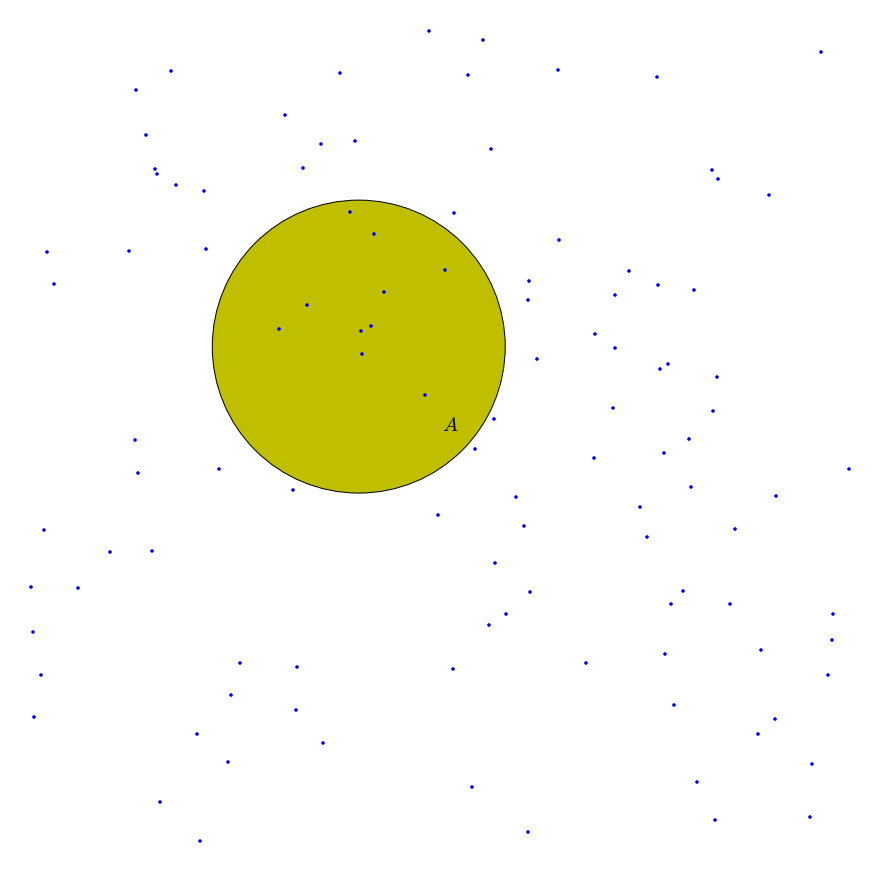

In [8]:
from matplotlib import pyplot as plt
import numpy as np
#Square side: L2
L2 = 10
#Average number of points (Poisson)
x_average_PPP = 100
#Number of points N that is a Poisson random variable 
x_realization_PPP = np.random.poisson(x_average_PPP,1)
#Random points in axis x
position_x_realization_PPP =  np.random.uniform(0,L2,x_realization_PPP)
#Random points in axis y
position_y_realization_PPP = np.random.uniform(0,L2,x_realization_PPP) 
#Plot commands
plt.figure(figsize=(15,15), dpi=1200)
plt.plot(position_x_realization_PPP, position_y_realization_PPP, marker='.', color='b',linestyle = '')
#Region A
circle = plt.Circle((4, 6), radius=1.75, fc='y')
plt.gca().add_patch(circle)
plt.text(5, 5, '$A$', fontsize=20)
#
plt.axis('off')
plt.show()

**Approach 2:** Other rather surprising way to characterize point processes is using the *vacancy indicator* $V(B)$ where $B$ is a closed set and $B \subset \mathbb{R}^2$. Mathematically: $V(B) = \mathbb{1}\{N(B) = 0\}$.

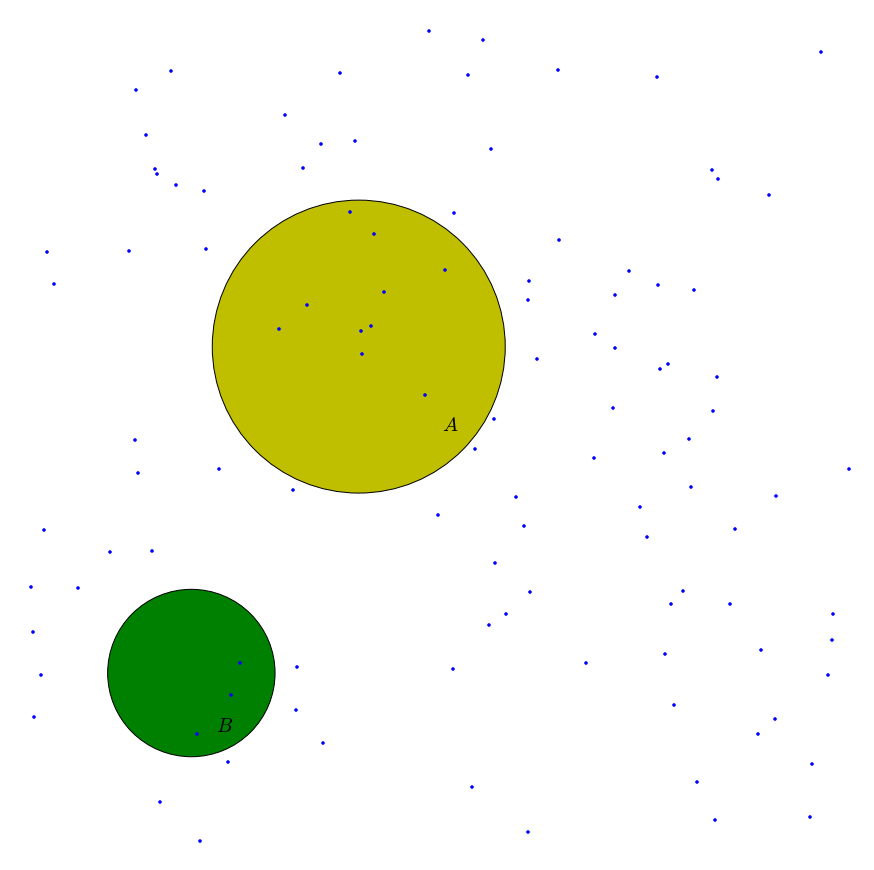

In [9]:
#Using the same plot as before. If you are running the program, remember that you need to define by yourself the vacancy (circle2)
plt.figure(figsize=(15,15), dpi=1200)
plt.plot(position_x_realization_PPP, position_y_realization_PPP, marker='.', color='b',linestyle = '')
#Region A
circle = plt.Circle((4, 6), radius=1.75, fc='y')
plt.gca().add_patch(circle)
plt.text(5, 5, '$A$', fontsize=20)
#Vacancy - region B
circle2 = plt.Circle((2, 2.1), radius=1, fc='g')
plt.gca().add_patch(circle2)
plt.text(2.3, 1.4, '$B$', fontsize=20)
#
plt.axis('off')
plt.show()

## 3. Foundations

### 3.1 Random measure formalism

Point processes are characterized by $N(A)$ such that $A \subset \mathbb{R}^d$. In this case $N(A)$ - which is called *couting measure* - is a random variable that assumes *non-negative integer* values.

**Few properties**

- $N( A \cup B) = N(A) + N(B) - N(A \cap B)$ for any set $A$, $B$

- $N( A \cup B) = N(A) + N(B)$ whenever $A \cap B = \emptyset$ (i.e. disjoint sets)

- $N( \emptyset) = 0$

- $N(A) < \infty$ with probability 1 if the point process is assumed *locally finite* for all bouded $A \subset \mathbb{R}^d$

- $N( \{x\}) \leq 1$ for all $x \in \mathbb{R}^d$ with probability 1 if the point process is assumed *simple* (no two points of the process are coincident)

### 3.2 Random set formalism

Point processes are characterized as a *countable random sets* $\Phi = \{ x_1, x_2,...\} \subset \mathbb{R}^d$. If we know the vacancy indicators $V(B)$ for all sets $B$, then we can know the exact loaciton of all points $x_1, x_2,...$ of $\Phi$ (if the process is simple). Mathematically: $\Phi = \mathbb{R}^d \; \backslash \bigcup \{ B \subset \mathbb{R}^d: V(B) =1\}$.

**Property:** $V( A \cup B) = V(A)V(B) = \min \{ V(A), V(B)\} $ for any set $A$, $B$

### 3.3 Duality         

There exists a duality between the two formalisms:

- $N(B) = $ number of points falling in  $\Phi \cap B$
- $\Phi = \{ x \in \mathbb{R}^d: N( \{x\}) = 1\}$

### 3.4 Superposition

Let us consider two point processes that are marked with different colors: red and blue. Then, the superposed point process has the following properties:

- $N(B) = N_\mathrm{red}(B) +  N_\mathrm{blue}(B) \\$ 

- $V(B) = V_\mathrm{red}(B)V_\mathrm{blue}(B)$

## 4. Example

**Homogeneous or uniform Poisson point processes**

The homogeneous or uniform Poisson point process (PPP), with intensity $\lambda$, is a point process in $\mathbb{R}^d$ such that:

- [P1] For every compact set $B$, $N(B)$ has a Poisson distribution with mean $\lambda \; \left|B \right|$;


- [P2] If $B_1, B_2,...,B_m$ are disjoint bounded sets, then $N(B_1), N(B_2), ... N(B_m)$ are independent random variables.

Note that $|\cdot|$ refers to the area of $B$ if the PPP is 2-dimension.

**Uniform binomial point process**

Let $\Phi = \{x_1,...,x_n\} \subset W \subset \mathbb{R}^d$ be apoint process with a fixed and finite number $n$ of points on the bounded region $W$. Then $\Phi$ is a uniform binomial point process (BPP) if and only if $\Phi$, viewed as a random vector, is uniformly distributed in $W^n$. 



## 5. Exercise: Prove the following

**Theorem (Conditional property for Poisson point processes):** Consider a homogeneous PPP in $\mathbb{R}^d$ with intensity $\lambda > 0$. Let $W \subset \mathbb{R}^d$ be any subset with $0<\left|B \right|< \infty$. Given that $N(W) = n$, the conditional distribution of $N(B)$ for $B \subseteq W$ is binomial:

$\mathbb{P}\left(N(B) = k \mid \; N(W) = n\right) = \left( \begin{array}{c} n \\ k \end{array} \right) \; p^k \; (1-p)^{n-k}$, where $p = \dfrac{\left|B \right|}{ \left|W \right|}$.

*Hint (PPP):* $\mathbb{P}\left( N(W) = n \right) = e^{-\lambda \left|W \right|} \; \dfrac{\left(\lambda \left|W \right| \right)^n}{n!}$.

## 6. References

[1] A. Baddeley, *Spatial Point Processes and their Applications*, pages 1-21.

[2] M. Haenngi, *Stochastic Geometry for Wireless Networks*, pages 9-21

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.